# The import Statement

Python is made up of several modules

Before you can use a module, you must import it
  

In [1]:
# First, we'll import pandas, a data processing and CSV file I/O library

import pandas as pd

import seaborn as sns # Python graphing library

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Creating Data Frames

Data frames are the central concept in pandas. 

In essence, a data frame is table with labeled rows and columns.

Data frames can be created from multiple sources - e.g. CSV files, excel files, and JSON.

Loading a CSV file as a data frame is pretty easy:

*data_frame = pandas.read_csv('file.csv', sep=';')*

Sometimes the CSV file contains padding spaces in front of the values. To ignore them use the skipinitialspaces parameter:

*pandas.read_csv('file.csv', sep=';', skipinitialspace=True)*

If the padding white spaces occur on both sides of the cell values we need to use a regular expression separator. In this case, we need to use the ‘python’ processing engine, instead of the underlying native one, in order to avoid warnings. This will degrade the performance a bit:

*pandas.read_csv('file.csv', sep='\s*;\s*', skipinitialspace=True, engine='python')*

Sometimes we need to sample the data before loading it, as it is too big to fit in memory. This can be achieved following this approach.


In [2]:
#  we'll load the Iris flower dataset using read_csv, which is in the  directory were we intialised our jupyter kernel
# read_csv -http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html


df = pd.read_csv('data/bezdekIris.data',names=['sepallength','sepalwidth','petallength','petalwidth','flower'])
data=df #assign dataframe  another name

#now data is pandas dataframe which contains iris data  
#dataframe -http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

#data.info - gives info about dataframe



# Previewing Data

To preview the data and the metadata of a dataframe you can use the following functions:

Displays the top 5 rows. Accepts an optional int parameter - num. of rows to show

*df.head()*

Similar to head, but displays the last rows

*df.tail()*

The dimensions of the dataframe as a (rows, cols) tuple

*df.shape*

The number of columns. Equal to df.shape[0]

*len(df)* 

An array of the column names

*df.columns* 

Columns and their types

*df.dtypes*

Converts the frame to a two-dimensional table

*df.values* 

Displays descriptive stats for all columns

*df.describe()*

In [3]:
#data.info - gives info about dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 150
Data columns (total 5 columns):
sepallength    150 non-null float64
sepalwidth     150 non-null float64
petallength    150 non-null float64
petalwidth     150 non-null float64
flower         150 non-null object
dtypes: float64(4), object(1)

# [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html)

1.loc is primarily label based, but may also be used with a boolean array. .loc will raise KeyError when the items are not found. Allowed inputs are:

    A single label, e.g. 5 or 'a', (note that 5 is interpreted as a label of the index. This use is not an integer position along the index)

    A list or array of labels ['a', 'b', 'c']

    A slice object with labels 'a':'f', (note that contrary to usual python slices, both the start and the stop are included!)

    A boolean array

    A callable function with one argument (the calling Series, DataFrame or Panel) and that returns valid output for 
indexing (one of the above)

2 .iloc is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array. .iloc will raise IndexError if a requested indexer is out-of-bounds, except slice indexers which allow out-of-bounds indexing. (this conforms with python/numpy slice semantics). Allowed inputs are:

    An integer e.g. 5

    A list or array of integers [4, 3, 0]

    A slice object with ints 1:7

    A boolean array

    A callable function with one argument (the calling Series, DataFrame or Panel) and that returns valid output for indexing (one of the above)
    
### Individual columns can be selected with the [] operator or directly as attributes:

Selects only the column named 'sepallength'

*data.sepallength or 
data['sepallength']*

Select two columns:

*data['sepalength','petallength']*

Selects First 4 rows and first 2 columns

*data.iloc[0:4, 0:2]*

[pandas intro](http://nikgrozev.com/2015/12/27/pandas-in-jupyter-quickstart-and-useful-snippets/#selecting_querying)

[pandas cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook-selection)



In [4]:
data.loc[1:4] #prints first 4 rows

,sepallength,sepalwidth,petallength,petalwidth,flower
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
print data['sepallength'] #selects coloum sepallength 

print data['sepallength'].loc[1:4] #selects first 4 rows of coloum sepallenght

0     5.1
1     4.9
2     4.7
3     4.6
4     5.0
5     5.4
6     4.6
7     5.0
8     4.4
9     4.9
10    5.4
11    4.8
12    4.8
13    4.3
14    5.8
...
136    6.3
137    6.4
138    6.0
139    6.9
140    6.7
141    6.9
142    5.8
143    6.8
144    6.7
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
150    NaN
Name: sepallength, Length: 151, dtype: float64
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepallength, dtype: float64


**It is often useful to create new columns based on existing ones by using a function. The new columns are often 
calledDerived Characteristics:**

1.*data['sepalsize']=data.sepallength*data.sepalwidth*  

2.you can use **numpy** underlying function:                  
  *data['sepalsize']=np.multiply(data['sepalwidth'],data['sepallength'])*           

3.you can use **funtions**          
    *def fab(row):     
        return row['sepallength'] ** row['sepalwidth']                                   
   
   data['sepalsize'] = data.apply(fab, axis=1)*  
4.**[lamda method](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.Series.apply.html)** 

In [6]:
#create a new coloum petalsize which is the product of petalwidth and petallength
data['sepalsize']=data.apply(lambda ssize: ssize['sepalwidth']*ssize['sepallength'],axis=1)

data['petalsize']=data.apply(lambda psize: psize['petalwidth']*psize['petallength'],axis=1)

data

,sepallength,sepalwidth,petallength,petalwidth,flower,sepalsize,petalsize
0,5.1,3.5,1.4,0.2,Iris-setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,Iris-setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,Iris-setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,Iris-setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,Iris-setosa,18.00,0.28
5,5.4,3.9,1.7,0.4,Iris-setosa,21.06,0.68
6,4.6,3.4,1.4,0.3,Iris-setosa,15.64,0.42
7,5.0,3.4,1.5,0.2,Iris-setosa,17.00,0.30
8,4.4,2.9,1.4,0.2,Iris-setosa,12.76,0.28
9,4.9,3.1,1.5,0.1,Iris-setosa,15.19,0.15


In [7]:
#drop all rows which have inalid data eg NaN
data=data.dropna()
data

,sepallength,sepalwidth,petallength,petalwidth,flower,sepalsize,petalsize
0,5.1,3.5,1.4,0.2,Iris-setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,Iris-setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,Iris-setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,Iris-setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,Iris-setosa,18.00,0.28
5,5.4,3.9,1.7,0.4,Iris-setosa,21.06,0.68
6,4.6,3.4,1.4,0.3,Iris-setosa,15.64,0.42
7,5.0,3.4,1.5,0.2,Iris-setosa,17.00,0.30
8,4.4,2.9,1.4,0.2,Iris-setosa,12.76,0.28
9,4.9,3.1,1.5,0.1,Iris-setosa,15.19,0.15


*Tables like this are rarely useful unless we know that our data should fall in a particular range. It's usually better to visualize the data in some way. Visualization makes outliers and errors immediately stand out, whereas they might go unnoticed in a large table of numbers*  

**some libraries used are**  
## [seaborn](http://seaborn.pydata.org/tutorial/axis_grids.html)  
## [matplotlib](http://matplotlib.org/users/beginner.html),[matplotlib tutorial](https://www.labri.fr/perso/nrougier/teaching/matplotlib/)  
## [mayavi](http://docs.enthought.com/mayavi/mayavi/)


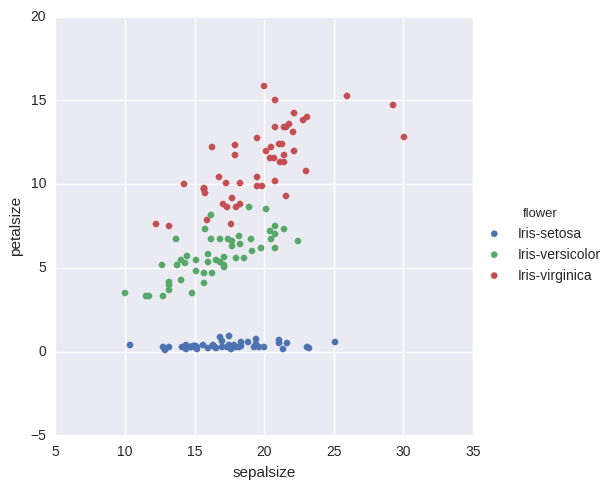

In [11]:
%matplotlib inline 
#this is to display the plot in ipython notebook itself

#plot petalsize against sepalsize and give diff colour based on flower 
sns.FacetGrid(data, hue="flower", size=5) \
   .map(plt.scatter, "sepalsize", "petalsize") \
   .add_legend()
sns.plt.show()


[# grouping of data](http://pandas.pydata.org/pandas-docs/stable/groupby.html#splitting-an-object-into-groups)      
By **group by** we are referring to a process involving one or more of the following steps  

    1.Splitting the data into groups based on some criteria  
    2.Applying a function to each group independently  
    3.Combining the results into a data structure  
Of these, the split step is the most straightforward. In fact, in many situations you may wish to split the data set into groups and do something with those groups yourself. In the apply step, we might wish to one of the following:  

    Aggregation: computing a summary statistic (or statistics) about each group. Some examples:

        Compute group sums or means
        Compute group sizes / counts
    Transformation: perform some group-specific computations and return a like-indexed. Some examples:

        Standardizing data (zscore) within group
        Filling NAs within groups with a value derived from each group
    Filtration: discard some groups, according to a group-wise computation that evaluates True or False. Some examples:

        Discarding data that belongs to groups with only a few members
        Filtering out data based on the group sum or mean
Some combination of the above: GroupBy will examine the results of the apply step and try to return a sensibly combined result if it doesn’t fit into either of the above two categories

In [10]:
grouped=data.groupby('flower')# data grouping  according to the flower ctgry
print grouped.size() #prints each group size

flower
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [12]:
print "\nSetosa data\n",grouped.get_group('Iris-setosa')# data for flower iris-sentosa



Setosa data
    sepallength  sepalwidth  petallength  petalwidth       flower  sepalsize  \
0           5.1         3.5          1.4         0.2  Iris-setosa      17.85   
1           4.9         3.0          1.4         0.2  Iris-setosa      14.70   
2           4.7         3.2          1.3         0.2  Iris-setosa      15.04   
3           4.6         3.1          1.5         0.2  Iris-setosa      14.26   
4           5.0         3.6          1.4         0.2  Iris-setosa      18.00   
5           5.4         3.9          1.7         0.4  Iris-setosa      21.06   
6           4.6         3.4          1.4         0.3  Iris-setosa      15.64   
7           5.0         3.4          1.5         0.2  Iris-setosa      17.00   
8           4.4         2.9          1.4         0.2  Iris-setosa      12.76   
9           4.9         3.1          1.5         0.1  Iris-setosa      15.19   
10          5.4         3.7          1.5         0.2  Iris-setosa      19.98   
11          4.8         3.4

In [13]:
#calculates mean and standard deviation for each coloum
grouped_stat=grouped['sepallength','sepalwidth','petallength','petalwidth','flower','petalsize','sepalsize']\
.agg([np.mean, np.std])

grouped_stat


sepallength            sepalwidth            petallength  \
                        mean       std        mean       std         mean   
flower                                                                      
Iris-setosa            5.006  0.352490       3.428  0.379064        1.462   
Iris-versicolor        5.936  0.516171       2.770  0.313798        4.260   
Iris-virginica         6.588  0.635880       2.974  0.322497        5.552   

                           petalwidth            petalsize            \
                      std        mean       std       mean       std   
flower                                                                 
Iris-setosa      0.173664       0.246  0.105386     0.3656  0.181155   
Iris-versicolor  0.469911       1.326  0.197753     5.7204  1.368403   
Iris-virginica   0.551895       2.026  0.274650    11.2962  2.157412   

                 sepalsize            
                      mean       std  
flower                                
Iris-setosa        17.2578  2.933775  
Iris-versicolor    16.5262  2.866882  
Iris-virginica     19.6846  3.458783

In [14]:
# mean value of Iris-stosa's sepallenght
print grouped_stat['sepallength']['mean']['Iris-versicolor']

5.936


# conditional operations 

when we apply column operation eg *df['sepallength']>5*.It returns a boolean Series objects as shown below


0    False
1     True
2     True
3     True
4    False
5    False
6     True
7     True
8     True
9     True  
And then we can use these to index into the object eg *df[df['sepallenght'>5]]* ,which lists all rows satisfying the condition  


To select rows whose column value equals a scalar, some_value, use ==:  

*df.loc[df['column_name'] == some_value]*  

To select rows whose column value is in an iterable, some_values, use isin:

*df.loc[df['column_name'].isin(some_values)]*  

To select rows whose column value does not equal some_value, use !=:  

*df.loc[df['column_name'] != some_value]*  

isin returns a boolean Series, so to select rows whose value is not in some_values, negate the boolean Series using ~:  

*df.loc[~df['column_name'].isin(some_values)]*

In [15]:

#select versicolor flower  where sepallenth greater than its mean
data_filter=data[(data.sepallength >grouped_stat['sepallength']['mean']['Iris-versicolor'] )\
                 & (data.flower =='Iris-versicolor')]
data

,sepallength,sepalwidth,petallength,petalwidth,flower,sepalsize,petalsize
0,5.1,3.5,1.4,0.2,Iris-setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,Iris-setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,Iris-setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,Iris-setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,Iris-setosa,18.00,0.28
5,5.4,3.9,1.7,0.4,Iris-setosa,21.06,0.68
6,4.6,3.4,1.4,0.3,Iris-setosa,15.64,0.42
7,5.0,3.4,1.5,0.2,Iris-setosa,17.00,0.30
8,4.4,2.9,1.4,0.2,Iris-setosa,12.76,0.28
9,4.9,3.1,1.5,0.1,Iris-setosa,15.19,0.15


In [16]:

#find data points of iris-virginica where the petal size is less than its mean
#find data points of iris versicolour where petal size is greater than its mean

criti3=(data.petalsize > grouped_stat['petalsize']['mean']['Iris-versicolor']) & (data.flower=='Iris-versicolor')
criti4=(data.petalsize < grouped_stat['petalsize']['mean']['Iris-virginica']) & (data.flower=='Iris-virginica') 


All = (criti3 | criti4)
data[All]



,sepallength,sepalwidth,petallength,petalwidth,flower,sepalsize,petalsize
50,7.0,3.2,4.7,1.4,Iris-versicolor,22.40,6.58
51,6.4,3.2,4.5,1.5,Iris-versicolor,20.48,6.75
52,6.9,3.1,4.9,1.5,Iris-versicolor,21.39,7.35
54,6.5,2.8,4.6,1.5,Iris-versicolor,18.20,6.90
55,5.7,2.8,4.5,1.3,Iris-versicolor,15.96,5.85
56,6.3,3.3,4.7,1.6,Iris-versicolor,20.79,7.52
58,6.6,2.9,4.6,1.3,Iris-versicolor,19.14,5.98
61,5.9,3.0,4.2,1.5,Iris-versicolor,17.70,6.30
63,6.1,2.9,4.7,1.4,Iris-versicolor,17.69,6.58
65,6.7,3.1,4.4,1.4,Iris-versicolor,20.77,6.16


**Scatterplot** matrices plot the distribution of each column along the diagonal, and then plot a scatterplot matrix for the combination of each variable. They make for an efficient tool to look for errors in our data.
We can even have the plotting package color each entry by its class to look for trends within the classes.

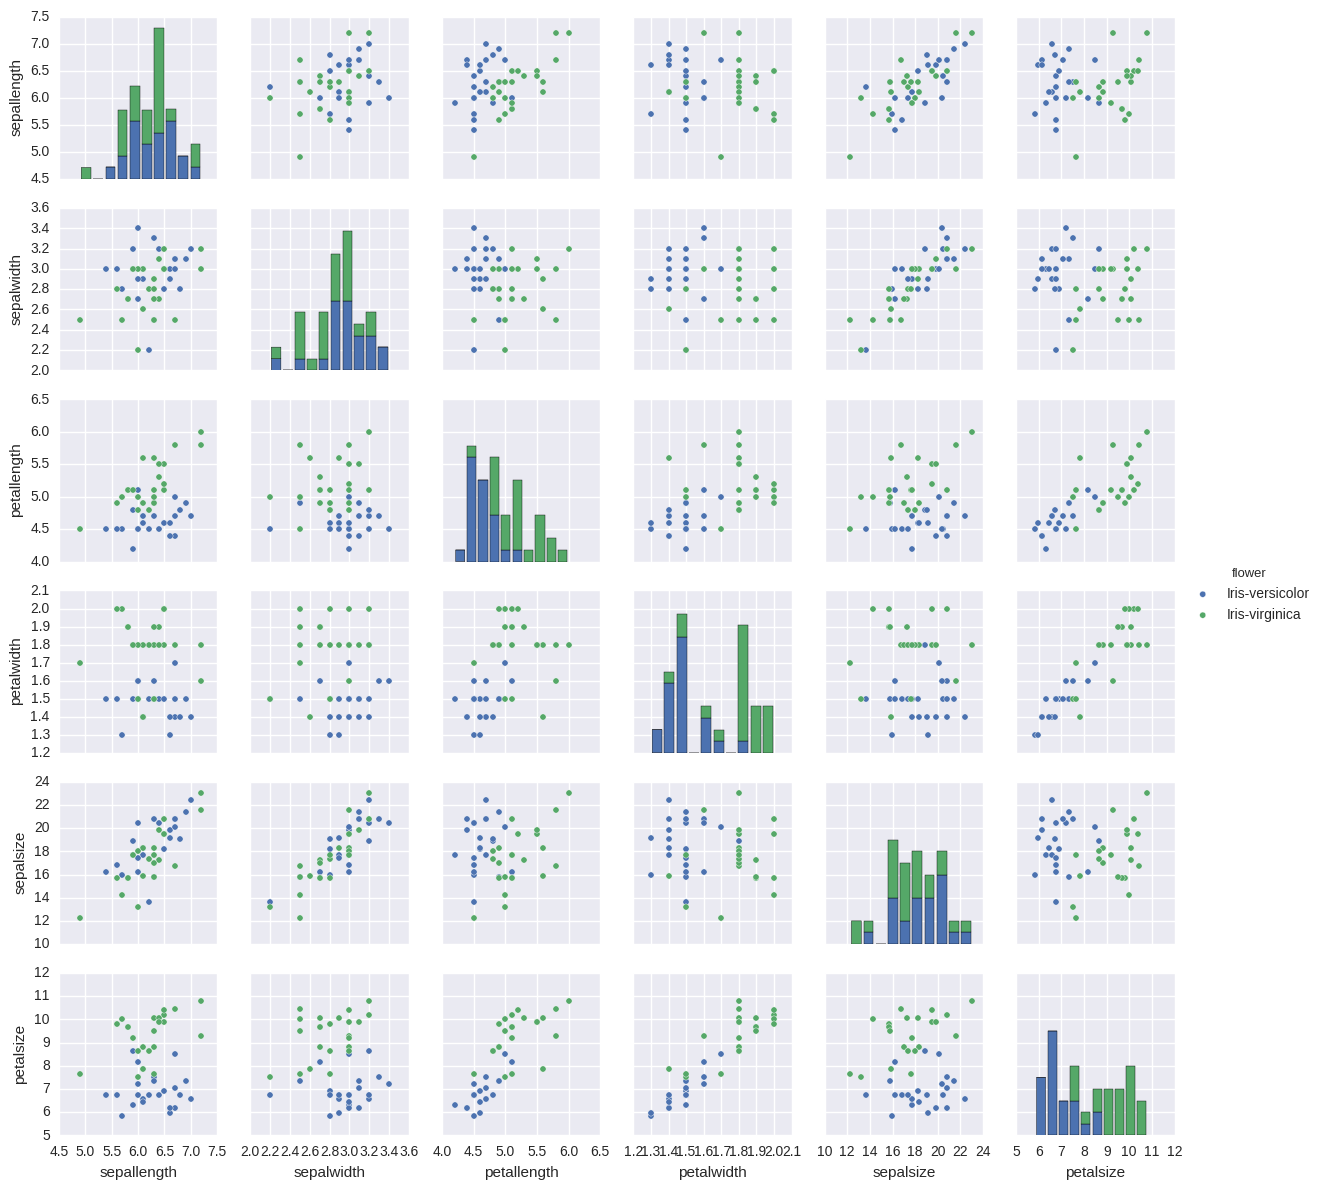

In [17]:
# plot shows the bivariate relation of columns in the new filterd data
# bar plot :separated green and blue bars shows the features ability to diffrentiate flower classes
sns.pairplot(data[All], hue="flower", size=2)

In [27]:

ngrouped=data[All].groupby('flower')

xv=np.array(ngrouped.get_group('Iris-versicolor')['sepalsize'])
yv=np.array(ngrouped.get_group('Iris-versicolor')['petalsize'])
zv=np.array(ngrouped.get_group('Iris-versicolor')['sepallength'])

xi=np.array(ngrouped.get_group('Iris-virginica')['sepalsize'])
yi=np.array(ngrouped.get_group('Iris-virginica')['petalsize'])
zi=np.array(ngrouped.get_group('Iris-virginica')['sepallength'])



## interative 3d plot

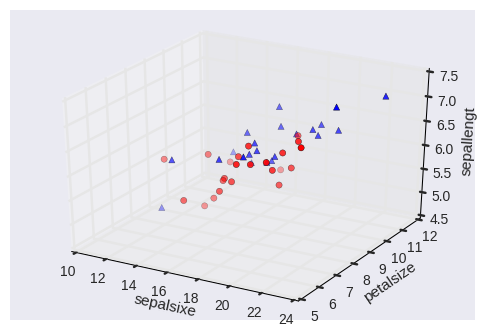

In [40]:
%matplotlib gtk
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xv, yv, zv, c='r', marker='o')
ax.scatter(xi, yi, zi, c='b', marker='^')

ax.set_xlabel('sepalsixe')
ax.set_ylabel('petalsize')
ax.set_zlabel('sepallengt')

plt.show()
